In [1]:
import pandas as pd
import networkx as nx

In [2]:
df = pd.read_json('C:/Users/lamersws1/Documents/Data/firstdata.json')

In [3]:
df.head()

,index,coordinates,created_at,user,timestamp_ms,text,retweet_count,retweeted_status,reply_count,entities
0,0,None,2018-05-25 15:03:49,"{'id': 2516920201, 'id_str': '2516920201', 'na...",2018-05-25 15:03:49.562,??? https://t.co/es4daoZHSf,0.0,None,0.0,"{'hashtags': [], 'urls': [{'url': 'https://t.c..."
1,1,None,2018-05-25 15:03:53,"{'id': 2682920203, 'id_str': '2682920203', 'na...",2018-05-25 15:03:53.259,#Hipismo Chuvi jimenez también es hipismo y ya...,0.0,None,0.0,"{'hashtags': [{'text': 'Hipismo', 'indices': [..."
10,10,None,2018-05-25 15:04:04,"{'id': 734197130, 'id_str': '734197130', 'name...",2018-05-25 15:04:04.847,@AaronHawryluk @elonmusk You didn't even let h...,0.0,None,0.0,"{'hashtags': [], 'urls': [{'url': 'https://t.c..."
100,100,None,2018-05-25 15:08:26,"{'id': 387019950, 'id_str': '387019950', 'name...",2018-05-25 15:08:26.309,RT @EYFrance: C’est parti pour le talk sur le ...,0.0,{'created_at': 'Fri May 25 13:47:53 +0000 2018...,0.0,"{'hashtags': [{'text': 'VivaTech', 'indices': ..."
1000,1000,None,2018-05-25 15:46:24,"{'id': 1004141089, 'id_str': '1004141089', 'na...",2018-05-25 15:46:24.481,The New Frontier of Fundraising: An Insider’s ...,0.0,None,0.0,"{'hashtags': [{'text': 'fundraising', 'indices..."


Explore available collumns

In [4]:
list(df)

['index',
 'coordinates',
 'created_at',
 'user',
 'timestamp_ms',
 'text',
 'retweet_count',
 'retweeted_status',
 'reply_count',
 'entities']

In [5]:
df.describe()

,index,retweet_count,reply_count
count,150000.000000,149999.0,149999.0
mean,4999.500000,0.0,0.0
std,2886.760954,0.0,0.0
min,0.000000,0.0,0.0
25%,2499.750000,0.0,0.0
50%,4999.500000,0.0,0.0
75%,7499.250000,0.0,0.0
max,9999.000000,0.0,0.0


Let's look at hashtags

In [6]:
df[df['entities'].isnull()]

,index,coordinates,created_at,user,timestamp_ms,text,retweet_count,retweeted_status,reply_count,entities
3758,3758,None,NaT,None,NaT,None,NaN,None,NaN,None


Remove this useless record from the data

In [ ]:
df = df[df['entities'].isnull() == False]

Let's look at the mentions network

In [7]:
def extract_mentions(df):

    out = []

    for index, row in df.iterrows():

        if isinstance(row.user, dict):
        
            assert isinstance(row.user, dict), "user is not dict in {}".format(index)
            assert isinstance(row.entities, dict), "entities is not dict in {}".format(index)
            usermentions = row.entities['user_mentions']

            for u in usermentions:
                out.append((row.user['id'], u['id']))
    
    return out

In [8]:
mentions = extract_mentions(df)

In [9]:
def extract_users(df):
    
    users = [(u['id'], u['screen_name'], u['name']) for u in df['user'] if isinstance(u, dict)]
    users = list(set(users))
    
    user_mentions = [u['user_mentions'] for u in df['entities'] if isinstance(u, dict)]
    for l in user_mentions:
        for u in l:
            users.append((u['id'], u['screen_name'], u['name']))
        
    users = list(set(users))
    
    users = {u[0]: {'name': u[2], 'screen_name': u[1]} for u in users}
    
    return users


In [10]:
users = extract_users(df)

In [11]:
G=nx.Graph()
G.add_edges_from(mentions)
nx.set_node_attributes(G, users)

In [12]:
Ggc = sorted(nx.connected_components(G), key=len, reverse=True)

In [16]:
SG = G.subgraph(Ggc[0])
top_connected_nodes = [x[0] for x in SG.degree() if x[1] > 50]
SG = G.subgraph(top_connected_nodes)
SG = SG.subgraph(sorted(nx.connected_components(SG), key=len, reverse=True)[0])

In [18]:
len(SG.nodes())

112

C:\Users\lamersws1\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


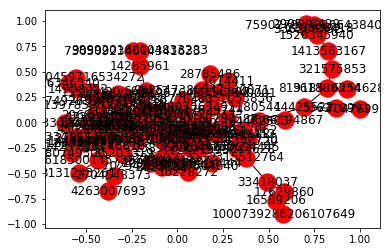

In [19]:
nx.draw_networkx(SG)

In [20]:
SG.nodes

NodeView((1002997262727839744, 1000739286206107649, 988310476173045760, 973897363491180544, 919676453347840001, 877788798687621121, 913187906440663040, 992547386047320071, 736185001457287169, 702542867227504640, 847492633463185410, 14335498, 905993768624472065, 989920160004833283, 2519044628, 2704548373, 19017255, 44196397, 290576429, 10228272, 9799222, 14627400, 1614411, 212325987, 2573880420, 296824934, 20571756, 14767730, 63786611, 14706299, 16838276, 14237828, 943123341824675841, 730509234614341633, 14285961, 4496967314, 40713876, 473958550, 17629860, 172621993, 4760694445, 1511340720, 2366194867, 3819701, 3191421627, 14998722, 64482503, 511740616, 4502885068, 1526345940, 1976143068, 115065053, 13334762, 339061487, 35203319, 1703007992, 19103481, 390167291, 3131243261, 1118579966, 722860459716534272, 209811713, 668423, 1051053836, 18994444, 361880334, 88776463, 27955989, 364547862, 15515420, 1449670430, 1413563167, 396451105, 323867425, 220826418, 33418037, 3227338044, 2425151, 110

In [21]:
nx.write_graphml(SG,'so.graphml')

In [31]:
SG.nodes.data()

NodeDataView({1002997262727839744: {'name': 'movingtogitlab', 'screen_name': 'movingtogitlab'}, 1000739286206107649: {'name': 'EyeTheSpy', 'screen_name': 'EyeTheSpy'}, 988310476173045760: {'name': 'CC.EXE', 'screen_name': 'CC_CURATOR'}, 973897363491180544: {'name': 'Code For The People', 'screen_name': 'codeforthepeopl'}, 919676453347840001: {'name': 'OpenSource IT', 'screen_name': 'GitHubIT'}, 877788798687621121: {'name': 'Linux Environment', 'screen_name': 'linux_en'}, 913187906440663040: {'name': 'Deconet', 'screen_name': 'Deco_Network'}, 992547386047320071: {'name': 'Mario Falso', 'screen_name': 'mario_falso'}, 736185001457287169: {'name': 'Helene Li ??', 'screen_name': 'helene_wpli'}, 702542867227504640: {'name': 'Trump DBA', 'screen_name': 'TrumpDBA'}, 847492633463185410: {'name': 'SingularityU Canada', 'screen_name': 'SingularityUCan'}, 14335498: {'name': 'Hacker News', 'screen_name': 'newsycombinator'}, 905993768624472065: {'name': 'Java Technology', 'screen_name': 'java_tec'},